In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from agglio_lib_softplus import *

In [3]:
#-------------------------------Data Generation section---------------------------#
n = 1000
d = 50
w_radius = 50
wAst = np.random.randn(d,1)
X = getData(0, 1, n, d)/np.sqrt(d)
w0 =w_radius*np.random.randn(d,1)/np.sqrt(d)
ipAst = np.matmul(X, wAst)
y = softplus(ipAst)

In [4]:
#-----------AGGLIO-GD-------------#
params={}
params['algo']='AG_GD'
params['w0']=w0
params['wAst']=wAst
objVals_agd,distVals_agd,time_agd = cross_validate(X,y,params,cross_validation=True)

The best parameters are {'B_init': 0.01, 'B_step': 1.01, 'alpha': 0.9444444444444444} with a score of -0.00


In [5]:
#-----------AGGLIO-SGD-------------#
params={}
params['algo']='AG_SGD'
params['w0']=w0
params['wAst']=wAst
objVals_agsgd,distVals_agsgd,time_agsgd = cross_validate(X,y,params,cross_validation=True)

The best parameters are {'B_init': 0.01, 'B_step': 1.01, 'alpha': 0.9444444444444444} with a score of -0.00


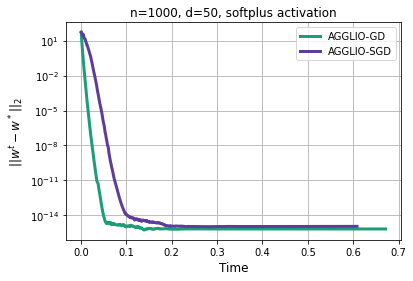

In [6]:
fig = plt.figure()
plt.semilogy(time_agd, distVals_agd, label='AGGLIO-GD', color='#1b9e77', linewidth=3)
plt.semilogy(time_agsgd, distVals_agsgd, label='AGGLIO-SGD',color='#5e3c99', linewidth=3)
plt.legend()
plt.ylabel("$||w^t-w^*||_2$",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.grid()
# plt.xscale('log')
plt.title(r'n=1000, d=50, softplus activation')
plt.show()

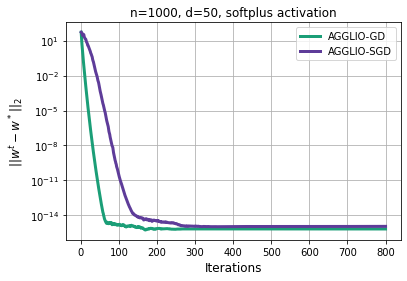

In [7]:
fig = plt.figure()
plt.semilogy(np.linspace(1,len(time_agd),num=len(time_agd)), distVals_agd, label='AGGLIO-GD', color='#1b9e77', linewidth=3)
plt.semilogy(np.linspace(1,len(time_agsgd),num=len(time_agsgd)), distVals_agsgd, label='AGGLIO-SGD',color='#5e3c99', linewidth=3)
plt.legend()
plt.ylabel("$||w^t-w^*||_2$",fontsize=12)
plt.xlabel("Iterations",fontsize=12)
plt.grid()
# plt.xscale('log')
plt.title(r'n=1000, d=50, softplus activation')
plt.show()